In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, SelectKBest, f_regression
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression   #Linear Regression using sklearn

import statsmodels.formula.api as smf               #Linear Regression using statsmodels

import pandas_profiling                             #To create data audit report ( you need to install this package using pip install pandas_profiling)

C:\Users\USER\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\USER\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\USER\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\USER\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\USER\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\USER\Anac

In [2]:
#import the data
data = pd.read_csv('LoansData.csv')

In [3]:
data.head()

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,1,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,4,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,5,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
LoanID                            2500 non-null int64
Amount.Requested                  2499 non-null float64
Amount.Funded.By.Investors        2499 non-null float64
Interest.Rate                     2498 non-null object
Loan.Length                       2500 non-null object
Loan.Purpose                      2500 non-null object
Debt.To.Income.Ratio              2499 non-null object
State                             2500 non-null object
Home.Ownership                    2499 non-null object
Monthly.Income                    2499 non-null float64
FICO.Range                        2498 non-null object
Open.CREDIT.Lines                 2497 non-null float64
Revolving.CREDIT.Balance          2497 non-null float64
Inquiries.in.the.Last.6.Months    2497 non-null float64
Employment.Length                 2423 non-null object
dtypes: float64(6), int64(1), object(8)
memory usage: 293.0+ KB

In [5]:
profile_report = pandas_profiling.ProfileReport(data)

In [6]:
profile_report.to_file('profile_report.html')

In [7]:
#some data types need data type conversions  - done
#Renaming columns is required  -done
# missings are existed
#Need to derive some columns - done
#Any variables with more zeros (why?)
#Any variables with highly correlated - done
#any variables with low variation
#any variables with outliers
#any special characters in the data - done
#list of categorical variable required to convert into numeric (encoding)


In [8]:
#Data type conversion (.astype, to_numeric etc..)
#IntrestRate
#debit_income_ration
#loan_leght
#employment length


data['Interest.Rate'] = data['Interest.Rate'].apply(lambda x: float(str(x).replace('%','')))

data['Debt.To.Income.Ratio'] = data['Debt.To.Income.Ratio'].apply(lambda x: float(str(x).replace('%','')))


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
LoanID                            2500 non-null int64
Amount.Requested                  2499 non-null float64
Amount.Funded.By.Investors        2499 non-null float64
Interest.Rate                     2498 non-null float64
Loan.Length                       2500 non-null object
Loan.Purpose                      2500 non-null object
Debt.To.Income.Ratio              2499 non-null float64
State                             2500 non-null object
Home.Ownership                    2499 non-null object
Monthly.Income                    2499 non-null float64
FICO.Range                        2498 non-null object
Open.CREDIT.Lines                 2497 non-null float64
Revolving.CREDIT.Balance          2497 non-null float64
Inquiries.in.the.Last.6.Months    2497 non-null float64
Employment.Length                 2423 non-null object
dtypes: float64(8), int64(1), object(6)
memory usage: 293.0+ 

In [10]:
data['Employment.Length'] = data['Employment.Length'].apply(lambda x: str(x).replace('< ',''))
data['Employment.Length'] = data['Employment.Length'].apply(lambda x: str(x).replace('+',''))
data['Employment.Length'] = data['Employment.Length'].apply(lambda x: str(x).replace(' years',''))
data['Employment.Length'] = data['Employment.Length'].apply(lambda x: float(str(x).replace(' year','')))

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
LoanID                            2500 non-null int64
Amount.Requested                  2499 non-null float64
Amount.Funded.By.Investors        2499 non-null float64
Interest.Rate                     2498 non-null float64
Loan.Length                       2500 non-null object
Loan.Purpose                      2500 non-null object
Debt.To.Income.Ratio              2499 non-null float64
State                             2500 non-null object
Home.Ownership                    2499 non-null object
Monthly.Income                    2499 non-null float64
FICO.Range                        2498 non-null object
Open.CREDIT.Lines                 2497 non-null float64
Revolving.CREDIT.Balance          2497 non-null float64
Inquiries.in.the.Last.6.Months    2497 non-null float64
Employment.Length                 2423 non-null float64
dtypes: float64(9), int64(1), object(5)
memory usage: 293.0+

In [12]:
data['Loan.Length'] = data['Loan.Length'].apply(lambda x: float(str(x).replace(' months','')))

In [13]:
data[['Fico_low','Fico_high']] = data['FICO.Range'].str.split('-', expand=True)

In [14]:
data.head()

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Fico_low,Fico_high
0,1,20000.0,20000.0,8.90,36.0,debt_consolidation,14.90,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,1.0,735,739
1,2,19200.0,19200.0,12.12,36.0,debt_consolidation,28.36,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2.0,715,719
2,3,35000.0,35000.0,21.98,60.0,debt_consolidation,23.81,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2.0,690,694
3,4,10000.0,9975.0,9.99,36.0,debt_consolidation,14.30,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5.0,695,699
4,5,12000.0,12000.0,11.71,36.0,credit_card,18.78,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9.0,695,699


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
LoanID                            2500 non-null int64
Amount.Requested                  2499 non-null float64
Amount.Funded.By.Investors        2499 non-null float64
Interest.Rate                     2498 non-null float64
Loan.Length                       2500 non-null float64
Loan.Purpose                      2500 non-null object
Debt.To.Income.Ratio              2499 non-null float64
State                             2500 non-null object
Home.Ownership                    2499 non-null object
Monthly.Income                    2499 non-null float64
FICO.Range                        2498 non-null object
Open.CREDIT.Lines                 2497 non-null float64
Revolving.CREDIT.Balance          2497 non-null float64
Inquiries.in.the.Last.6.Months    2497 non-null float64
Employment.Length                 2423 non-null float64
Fico_low                          2498 non-null object
Fico

In [16]:
data['Fico_avg'] = (data.Fico_low.astype('float')+data.Fico_high.astype('float'))/2

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
LoanID                            2500 non-null int64
Amount.Requested                  2499 non-null float64
Amount.Funded.By.Investors        2499 non-null float64
Interest.Rate                     2498 non-null float64
Loan.Length                       2500 non-null float64
Loan.Purpose                      2500 non-null object
Debt.To.Income.Ratio              2499 non-null float64
State                             2500 non-null object
Home.Ownership                    2499 non-null object
Monthly.Income                    2499 non-null float64
FICO.Range                        2498 non-null object
Open.CREDIT.Lines                 2497 non-null float64
Revolving.CREDIT.Balance          2497 non-null float64
Inquiries.in.the.Last.6.Months    2497 non-null float64
Employment.Length                 2423 non-null float64
Fico_low                          2498 non-null object
Fico

In [18]:
data = data.drop(['Fico_low', 'Fico_high', 'FICO.Range', 'LoanID', 'Amount.Funded.By.Investors' ], axis=1)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
Amount.Requested                  2499 non-null float64
Interest.Rate                     2498 non-null float64
Loan.Length                       2500 non-null float64
Loan.Purpose                      2500 non-null object
Debt.To.Income.Ratio              2499 non-null float64
State                             2500 non-null object
Home.Ownership                    2499 non-null object
Monthly.Income                    2499 non-null float64
Open.CREDIT.Lines                 2497 non-null float64
Revolving.CREDIT.Balance          2497 non-null float64
Inquiries.in.the.Last.6.Months    2497 non-null float64
Employment.Length                 2423 non-null float64
Fico_avg                          2498 non-null float64
dtypes: float64(10), object(3)
memory usage: 254.0+ KB


In [20]:
len(data.State.value_counts())

46

In [21]:
data = data.drop(['State'], axis=1)

In [22]:
data.columns= [x.strip().replace('.', '_') for x in data.columns]

In [23]:
data.columns

Index(['Amount_Requested', 'Interest_Rate', 'Loan_Length', 'Loan_Purpose',
       'Debt_To_Income_Ratio', 'Home_Ownership', 'Monthly_Income',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Employment_Length', 'Fico_avg'],
      dtype='object')

In [24]:
cata_vars = ['Loan_Purpose', 'Home_Ownership']
num_vars =  ['Amount_Requested', 'Interest_Rate', 'Loan_Length', 
       'Debt_To_Income_Ratio', 'Monthly_Income',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Employment_Length', 'Fico_avg']

In [25]:
data_cat = data[cata_vars]
data_num = data[num_vars]

In [26]:
data_num.head()

,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_avg
0,20000.0,8.90,36.0,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0
1,19200.0,12.12,36.0,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0
2,35000.0,21.98,60.0,23.81,11500.00,14.0,21977.0,1.0,2.0,692.0
3,10000.0,9.99,36.0,14.30,3833.33,10.0,9346.0,0.0,5.0,697.0
4,12000.0,11.71,36.0,18.78,3195.00,11.0,14469.0,0.0,9.0,697.0


In [27]:
dict(data.dtypes)

{'Amount_Requested': dtype('float64'),
 'Interest_Rate': dtype('float64'),
 'Loan_Length': dtype('float64'),
 'Loan_Purpose': dtype('O'),
 'Debt_To_Income_Ratio': dtype('float64'),
 'Home_Ownership': dtype('O'),
 'Monthly_Income': dtype('float64'),
 'Open_CREDIT_Lines': dtype('float64'),
 'Revolving_CREDIT_Balance': dtype('float64'),
 'Inquiries_in_the_Last_6_Months': dtype('float64'),
 'Employment_Length': dtype('float64'),
 'Fico_avg': dtype('float64')}

In [28]:
#Alternative method to split the numerical & categorical dynamically
numeric_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['Amount_Requested', 'Interest_Rate', 'Loan_Length', 'Debt_To_Income_Ratio', 'Monthly_Income', 'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months', 'Employment_Length', 'Fico_avg']
['Loan_Purpose', 'Home_Ownership']


In [29]:
data_num.Amount_Requested.quantile(0.01)

1500.0

In [30]:
data_num.Amount_Requested.quantile(0.99)

35000.0

In [31]:
data_num.Amount_Requested.min()

1000.0

In [32]:
data_num.Amount_Requested.max()

35000.0

In [33]:
data_num['Amount_Requested'] = data_num.Amount_Requested.clip_upper(35000)
data_num['Amount_Requested'] = data_num.Amount_Requested.clip_lower(1500)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
def outlier_miss_treat(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    x = x.fillna(x.median())
    return x

In [35]:
data_num_new = data_num.apply(outlier_miss_treat)

In [36]:
data_num.describe()

,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_avg
count,2499.000000,2498.000000,2500.000000,2499.000000,2499.000000,2497.000000,2497.000000,2497.000000,2423.000000,2498.000000
mean,12409.073629,13.065388,41.260800,15.380420,5688.931321,10.072887,15223.184622,0.906688,5.491952,707.904724
std,7797.780053,4.177201,9.930893,7.505052,3963.118185,4.507416,18281.015258,1.231149,3.441957,35.042199
min,1500.000000,5.420000,36.000000,0.000000,588.500000,2.000000,0.000000,0.000000,1.000000,642.000000
25%,6000.000000,10.160000,36.000000,9.750000,3500.000000,7.000000,5584.000000,0.000000,2.000000,682.000000
50%,10000.000000,13.110000,36.000000,15.320000,5000.000000,9.000000,10948.000000,0.000000,5.000000,702.000000
75%,17000.000000,15.800000,36.000000,20.675000,6800.000000,13.000000,18861.000000,1.000000,10.000000,727.000000
max,35000.000000,24.890000,60.000000,34.910000,102750.000000,38.000000,270800.000000,9.000000,10.000000,832.000000


In [37]:
data_num_new.describe()

,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_avg
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000
mean,12408.110000,13.060383,41.260800,15.378504,5608.30546,10.052800,14764.598800,0.88640,5.476800,707.914000
std,7796.368598,4.147574,9.930893,7.478992,3083.77547,4.377405,14758.856976,1.14176,3.389581,34.751369
min,1500.000000,5.984000,36.000000,0.718000,1416.40320,3.000000,0.000000,0.00000,1.000000,662.000000
25%,6000.000000,10.160000,36.000000,9.750000,3500.00000,7.000000,5589.250000,0.00000,2.000000,682.000000
50%,10000.000000,13.110000,36.000000,15.320000,5000.00000,9.000000,10948.000000,0.00000,5.000000,702.000000
75%,17000.000000,15.800000,36.000000,20.672500,6800.00000,13.000000,18843.750000,1.00000,10.000000,727.000000
max,35000.000000,22.959900,60.000000,33.230000,18750.00000,23.000000,92433.640000,5.00000,10.000000,807.000000


In [38]:
def miss_treat_cat(x):
    x = x.fillna(x.mode())
    return x

In [39]:
data_cat_new = data_cat.apply(miss_treat_cat)

In [40]:
data_cat_new.head()

,Loan_Purpose,Home_Ownership
0,debt_consolidation,MORTGAGE
1,debt_consolidation,MORTGAGE
2,debt_consolidation,MORTGAGE
3,debt_consolidation,MORTGAGE
4,credit_card,RENT


In [41]:
cat_dummies = pd.get_dummies(data_cat_new, drop_first=True)

In [42]:
data_new = pd.concat([data_num_new, cat_dummies], axis=1)

In [43]:
data_new.head()

,Amount_Requested,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Fico_avg,...,Loan_Purpose_moving,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,Home_Ownership_NONE,Home_Ownership_OTHER,Home_Ownership_OWN,Home_Ownership_RENT
0,20000.0,8.90,36.0,14.90,6541.67,14.0,14272.0,2.0,1.0,737.0,...,0,0,0,0,0,0,0,0,0,0
1,19200.0,12.12,36.0,28.36,4583.33,12.0,11140.0,1.0,2.0,717.0,...,0,0,0,0,0,0,0,0,0,0
2,35000.0,21.98,60.0,23.81,11500.00,14.0,21977.0,1.0,2.0,692.0,...,0,0,0,0,0,0,0,0,0,0
3,10000.0,9.99,36.0,14.30,3833.33,10.0,9346.0,0.0,5.0,697.0,...,0,0,0,0,0,0,0,0,0,0
4,12000.0,11.71,36.0,18.78,3195.00,11.0,14469.0,0.0,9.0,697.0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
data_new.Interest_Rate.hist?

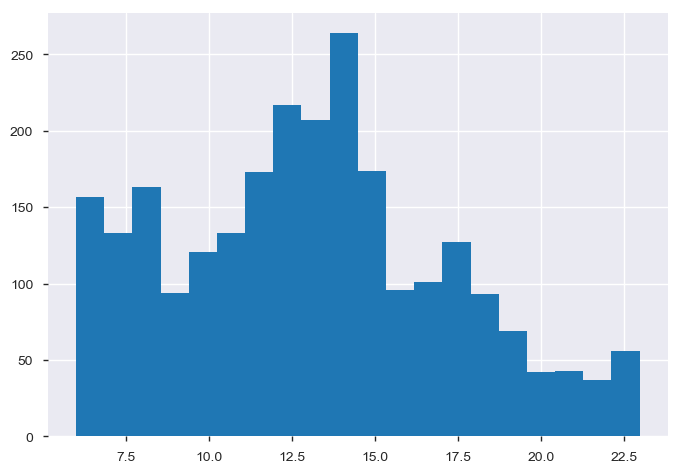

In [45]:
#Data preparation step-2 - Assumptions of linear regression
# Normality
data_new.Interest_Rate.hist(bins=20)

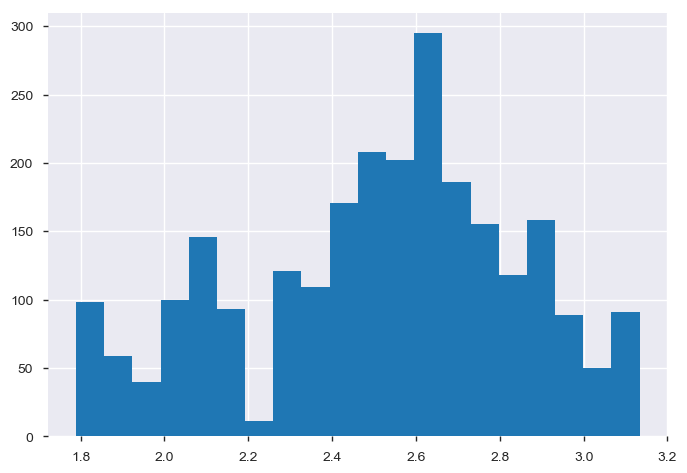

In [46]:
np.log(data_new.Interest_Rate).hist(bins=20)

In [47]:
data_new['ln_Interest_Rate'] =  np.log(data_new.Interest_Rate)

In [48]:
data_new.corrwith(data_new.ln_Interest_Rate)

Amount_Requested                   0.301991
Interest_Rate                      0.982431
Loan_Length                        0.386342
Debt_To_Income_Ratio               0.178772
Monthly_Income                     0.014245
Open_CREDIT_Lines                  0.068331
Revolving_CREDIT_Balance           0.079789
Inquiries_in_the_Last_6_Months     0.177427
Employment_Length                  0.036027
Fico_avg                          -0.744196
Loan_Purpose_credit_card           0.005054
Loan_Purpose_debt_consolidation    0.133565
Loan_Purpose_educational          -0.036673
Loan_Purpose_home_improvement     -0.097748
Loan_Purpose_house                 0.003179
Loan_Purpose_major_purchase       -0.111812
Loan_Purpose_medical              -0.045235
Loan_Purpose_moving                0.009556
Loan_Purpose_other                 0.007845
Loan_Purpose_renewable_energy     -0.031531
Loan_Purpose_small_business       -0.011296
Loan_Purpose_vacation             -0.025117
Loan_Purpose_wedding            

#list of X variables having linear relationship with Y

Amount_Requested,
Loan_Length,
Debt_To_Income_Ratio,
Inquiries_in_the_Last_6_Months,
Fico_avg,
Loan_Purpose_debt_consolidation,
Loan_Purpose_major_purchase


### Feature Reduction
### F_Regression

In [49]:

from sklearn.feature_selection import RFE, SelectKBest, f_regression, f_oneway

In [50]:
data_new.columns.difference(['Interest_Rate', 'ln_Interest_Rate'])

Index(['Amount_Requested', 'Debt_To_Income_Ratio', 'Employment_Length',
       'Fico_avg', 'Home_Ownership_NONE', 'Home_Ownership_OTHER',
       'Home_Ownership_OWN', 'Home_Ownership_RENT',
       'Inquiries_in_the_Last_6_Months', 'Loan_Length',
       'Loan_Purpose_credit_card', 'Loan_Purpose_debt_consolidation',
       'Loan_Purpose_educational', 'Loan_Purpose_home_improvement',
       'Loan_Purpose_house', 'Loan_Purpose_major_purchase',
       'Loan_Purpose_medical', 'Loan_Purpose_moving', 'Loan_Purpose_other',
       'Loan_Purpose_renewable_energy', 'Loan_Purpose_small_business',
       'Loan_Purpose_vacation', 'Loan_Purpose_wedding', 'Monthly_Income',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance'],
      dtype='object')

In [51]:
features = data_new.columns.difference(['Interest_Rate', 'ln_Interest_Rate'])

In [52]:
features

Index(['Amount_Requested', 'Debt_To_Income_Ratio', 'Employment_Length',
       'Fico_avg', 'Home_Ownership_NONE', 'Home_Ownership_OTHER',
       'Home_Ownership_OWN', 'Home_Ownership_RENT',
       'Inquiries_in_the_Last_6_Months', 'Loan_Length',
       'Loan_Purpose_credit_card', 'Loan_Purpose_debt_consolidation',
       'Loan_Purpose_educational', 'Loan_Purpose_home_improvement',
       'Loan_Purpose_house', 'Loan_Purpose_major_purchase',
       'Loan_Purpose_medical', 'Loan_Purpose_moving', 'Loan_Purpose_other',
       'Loan_Purpose_renewable_energy', 'Loan_Purpose_small_business',
       'Loan_Purpose_vacation', 'Loan_Purpose_wedding', 'Monthly_Income',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance'],
      dtype='object')

In [53]:
X = data_new[features]
Y= data_new['ln_Interest_Rate']

In [54]:
F_values, p_values  = f_regression(  X, Y )

In [55]:
f_reg_results = pd.concat([pd.Series(X.columns), pd.Series(F_values), pd.Series(p_values)], axis=1)

In [56]:
f_reg_results.columns = ['Feature', 'F_Value', 'P_Value']

In [57]:
f_reg_results.sort_values('F_Value', ascending=False, inplace=True)

In [58]:
f_reg_results

,Feature,F_Value,P_Value
3,Fico_avg,3100.724445,0.000000e+00
9,Loan_Length,438.267854,8.536924e-90
0,Amount_Requested,250.674653,7.067959e-54
1,Debt_To_Income_Ratio,82.469906,2.122468e-19
8,Inquiries_in_the_Last_6_Months,81.193740,3.966141e-19
11,Loan_Purpose_debt_consolidation,45.372662,2.014570e-11
15,Loan_Purpose_major_purchase,31.624958,2.078118e-08
13,Loan_Purpose_home_improvement,24.097597,9.747763e-07
7,Home_Ownership_RENT,18.616762,1.660250e-05
25,Revolving_CREDIT_Balance,16.004991,6.501218e-05


In [59]:
f_reg_results.to_csv('F_Reg_Results.csv')

### Recursive Feature Elimination (RFE)

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
RFE_model = RFE(LinearRegression(), n_features_to_select=10)

In [62]:
RFE_model= RFE_model.fit(X, Y)

In [63]:
X.columns

Index(['Amount_Requested', 'Debt_To_Income_Ratio', 'Employment_Length',
       'Fico_avg', 'Home_Ownership_NONE', 'Home_Ownership_OTHER',
       'Home_Ownership_OWN', 'Home_Ownership_RENT',
       'Inquiries_in_the_Last_6_Months', 'Loan_Length',
       'Loan_Purpose_credit_card', 'Loan_Purpose_debt_consolidation',
       'Loan_Purpose_educational', 'Loan_Purpose_home_improvement',
       'Loan_Purpose_house', 'Loan_Purpose_major_purchase',
       'Loan_Purpose_medical', 'Loan_Purpose_moving', 'Loan_Purpose_other',
       'Loan_Purpose_renewable_energy', 'Loan_Purpose_small_business',
       'Loan_Purpose_vacation', 'Loan_Purpose_wedding', 'Monthly_Income',
       'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance'],
      dtype='object')

In [64]:
RFE_model.get_support()

array([False, False, False, False,  True,  True, False, False, False,
       False,  True,  True, False, False,  True, False, False,  True,
        True, False,  True,  True,  True, False, False, False])

In [65]:
RFE_selected_Cols = X.columns[list(RFE_model.get_support())]

In [66]:
RFE_model.ranking_

array([15, 14, 11,  9,  1,  1,  3, 10,  2,  4,  1,  1,  5,  8,  1,  7, 12,
        1,  1,  6,  1,  1,  1, 16, 13, 17])

In [67]:
pd.Series(RFE_selected_Cols)

0                Home_Ownership_NONE
1               Home_Ownership_OTHER
2           Loan_Purpose_credit_card
3    Loan_Purpose_debt_consolidation
4                 Loan_Purpose_house
5                Loan_Purpose_moving
6                 Loan_Purpose_other
7        Loan_Purpose_small_business
8              Loan_Purpose_vacation
9               Loan_Purpose_wedding
dtype: object

### SelectKBest

In [68]:
selectkbest = SelectKBest(f_oneway, k=10)

In [69]:
selectkbest = selectkbest.fit(X,Y)

In [70]:
selectkbest.get_support()

array([False, False, False,  True,  True,  True, False, False, False,
       False, False, False,  True, False,  True, False,  True,  True,
       False,  True, False,  True,  True, False, False, False])

In [71]:
selectKbest_Cols = X.columns[list(selectkbest.get_support())]

In [72]:
pd.Series(selectKbest_Cols)

0                         Fico_avg
1              Home_Ownership_NONE
2             Home_Ownership_OTHER
3         Loan_Purpose_educational
4               Loan_Purpose_house
5             Loan_Purpose_medical
6              Loan_Purpose_moving
7    Loan_Purpose_renewable_energy
8            Loan_Purpose_vacation
9             Loan_Purpose_wedding
dtype: object

#### Reducing further list of variables using VIF (By remove multicollinierity)

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [74]:
X_New = X[['Amount_Requested','Loan_Length','Debt_To_Income_Ratio','Inquiries_in_the_Last_6_Months','Fico_avg','Loan_Purpose_debt_consolidation','Loan_Purpose_major_purchase','Home_Ownership_NONE','Home_Ownership_OTHER','Loan_Purpose_educational','Loan_Purpose_house','Loan_Purpose_medical','Loan_Purpose_moving','Loan_Purpose_renewable_energy','Loan_Purpose_vacation','Loan_Purpose_wedding','Loan_Purpose_home_improvement','Home_Ownership_RENT','Revolving_CREDIT_Balance','Open_CREDIT_Lines','Loan_Purpose_credit_card','Loan_Purpose_other','Loan_Purpose_small_business']]

In [75]:
X_New = X_New[X_New.columns.difference([ 'Loan_Purpose_debt_consolidation', 'Loan_Length', 'Open_CREDIT_Lines', 'Debt_To_Income_Ratio', 'Revolving_CREDIT_Balance', 'Home_Ownership_RENT'])]

In [76]:
VIF = [variance_inflation_factor(X_New.values, i) for i in range(X_New.shape[1])]

In [77]:
VIF_results = pd.concat([pd.Series(X_New.columns), pd.Series(VIF)], axis=1)
VIF_results.columns = ['Feature', 'VIF']
VIF_results.sort_values('VIF', ascending=False, inplace=True)
VIF_results

,Feature,VIF
1,Fico_avg,5.775424
0,Amount_Requested,3.816253
4,Inquiries_in_the_Last_6_Months,1.605244
5,Loan_Purpose_credit_card,1.329892
12,Loan_Purpose_other,1.192121
7,Loan_Purpose_home_improvement,1.122241
9,Loan_Purpose_major_purchase,1.103967
14,Loan_Purpose_small_business,1.067533
10,Loan_Purpose_medical,1.034368
16,Loan_Purpose_wedding,1.031045


In [78]:
#Final list of columns to be included in the model
X_New.columns

Index(['Amount_Requested', 'Fico_avg', 'Home_Ownership_NONE',
       'Home_Ownership_OTHER', 'Inquiries_in_the_Last_6_Months',
       'Loan_Purpose_credit_card', 'Loan_Purpose_educational',
       'Loan_Purpose_home_improvement', 'Loan_Purpose_house',
       'Loan_Purpose_major_purchase', 'Loan_Purpose_medical',
       'Loan_Purpose_moving', 'Loan_Purpose_other',
       'Loan_Purpose_renewable_energy', 'Loan_Purpose_small_business',
       'Loan_Purpose_vacation', 'Loan_Purpose_wedding'],
      dtype='object')

### Split the data into train & test

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
data_new2 = pd.concat([X_New, Y], axis=1)

In [81]:
data_new2.head()

,Amount_Requested,Fico_avg,Home_Ownership_NONE,Home_Ownership_OTHER,Inquiries_in_the_Last_6_Months,Loan_Purpose_credit_card,Loan_Purpose_educational,Loan_Purpose_home_improvement,Loan_Purpose_house,Loan_Purpose_major_purchase,Loan_Purpose_medical,Loan_Purpose_moving,Loan_Purpose_other,Loan_Purpose_renewable_energy,Loan_Purpose_small_business,Loan_Purpose_vacation,Loan_Purpose_wedding,ln_Interest_Rate
0,20000.0,737.0,0,0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,2.186051
1,19200.0,717.0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,2.494857
2,35000.0,692.0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,3.090133
3,10000.0,697.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2.301585
4,12000.0,697.0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,2.460443


In [82]:
train, test = train_test_split(data_new2, test_size = 0.3, random_state =123)

### Model Building

In [83]:
import statsmodels.formula.api as smf

In [84]:
formula = 'ln_Interest_Rate' + '~' + '+'.join(train.columns.difference(['ln_Interest_Rate','Loan_Purpose_moving','Loan_Purpose_house','Loan_Purpose_wedding' ,'Home_Ownership_NONE','Loan_Purpose_renewable_energy','Loan_Purpose_home_improvement', 'Home_Ownership_OTHER', 'Loan_Purpose_educational', 'Loan_Purpose_vacation', 'Loan_Purpose_medical']))

In [85]:
model = smf.ols(formula , data = train)
model = model.fit()

In [86]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       ln_Interest_Rate   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     628.1
Date:                Sun, 12 May 2019   Prob (F-statistic):               0.00
Time:                        10:33:39   Log-Likelihood:                 509.85
No. Observations:                1750   AIC:                            -1004.
Df Residuals:                    1742   BIC:                            -960.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

### Validation of Model

In [87]:
test_pred = np.exp(model.predict(test))
train_pred = np.exp(model.predict(train))

In [88]:
train_y = np.exp(train.ln_Interest_Rate)
test_y = np.exp(test.ln_Interest_Rate)

In [89]:
#Metrics for train data
MAPE_train = np.mean(np.abs(train_y - train_pred)/train_y)
print('Train_MAPE=', MAPE_train)
RMSE_train = np.sqrt(np.mean(np.square(train_y - train_pred)))
print('Train_RMSE=',RMSE_train)
RMSPE_train =np.sqrt(np.mean(np.square((train_y - train_pred)/train_y)))
print('Train_RMSPE=',RMSPE_train)
corr_train = np.corrcoef(train_y, train_pred)[1][0]
print('Train_Corr=',corr_train)


Train_MAPE= 0.14204579567898115
Train_RMSE= 2.2331050785043605
Train_RMSPE= 0.18629967647689505
Train_Corr= 0.8438900770459165


In [90]:
#Metrics for test data
MAPE_test = np.mean(np.abs(test_y - test_pred)/test_y)
print('Test_MAPE=', MAPE_test)
RMSE_test = np.sqrt(np.mean(np.square(test_y - test_pred)))
print('Test_RMSE=',RMSE_test)
RMSPE_test =np.sqrt(np.mean(np.square((test_y - test_pred)/test_y)))
print('Test_RMSPE=',RMSPE_test)
corr_test = np.corrcoef(test_y, test_pred)[1][0]
print('Test_Corr=',corr_test)

Test_MAPE= 0.14750240590455235
Test_RMSE= 2.319708085615091
Test_RMSPE= 0.19265799584707488
Test_Corr= 0.8321835739129096


In [91]:
### Saving model as object
import pickle
# now you can save it to a file
with open('reg_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [92]:
#Loading the model object
import pickle
# and later you can load it
with open('reg_model.pkl', 'rb') as f:
    model = pickle.load(f)

### Model validation using Decile Analysis

In [109]:
train_new = pd.concat([train_y, train_pred], axis=1)
train_new.columns = ['actual', 'pred']
test_new = pd.concat([test_y, test_pred], axis=1)
test_new.columns = ['actual', 'pred']

In [127]:
train_new['Deciles'] = pd.qcut(train_new.pred, 10, labels=False)

In [128]:
train_new.groupby('Deciles').mean()

,actual,pred
Deciles,,
0,7.462366,6.992179
1,8.744263,8.990606
2,9.777600,10.347575
3,11.548857,11.416473
4,12.783771,12.407240
5,13.546229,13.340801
6,14.679714,14.263581
7,15.795257,15.183595
8,16.789943,16.214508


In [129]:
test_new['Deciles'] = pd.qcut(test_new.pred, 10, labels=False)

In [130]:
test_new.groupby('Deciles').mean()

,actual,pred
Deciles,,
0,7.777067,7.055170
1,8.889867,9.317640
2,10.324000,10.546000
3,11.500933,11.597560
4,12.765333,12.513082
5,13.921818,13.347130
6,14.727123,14.157044
7,15.559733,15.015880
8,16.738800,16.293275


### Check assumptions of Linear Regression using errors (Bias, Residuals)

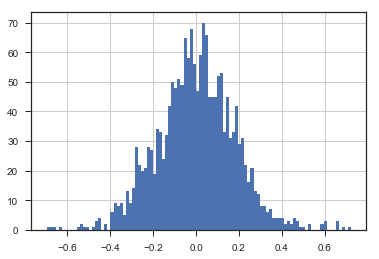

In [102]:
model.resid.hist(bins=100)

In [104]:
np.corrcoef(train_y, train_pred)

array([[1.        , 0.84389008],
       [0.84389008, 1.        ]])

In [105]:
np.corrcoef(train_y, model.resid)

array([[1.        , 0.52629863],
       [0.52629863, 1.        ]])

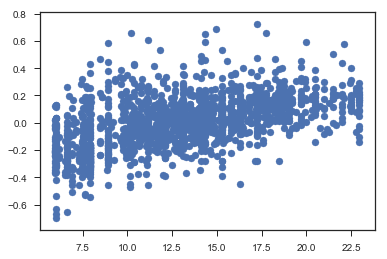

In [106]:
plt.scatter(train_y, model.resid)

## Python foundations questions - sample codes

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

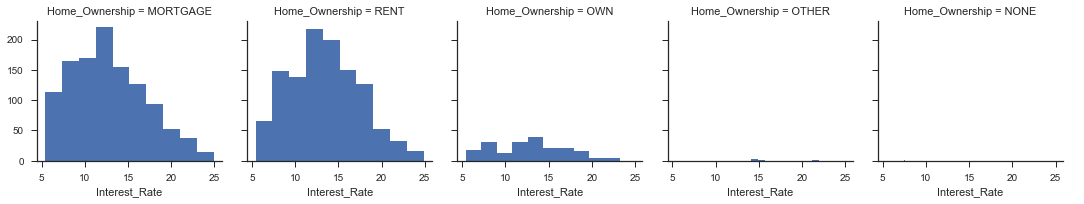

In [94]:
# creates the FaceGrid
g = sns.FacetGrid(data, col="Home_Ownership")

# map over a make a scatterplot
g.map(plt.hist, "Interest_Rate")

# adds legend
g.add_legend();

In [95]:
data_new = data[['Home_Ownership','Interest_Rate' ]].groupby(by = ['Home_Ownership'])

Home_Ownership
MORTGAGE    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
NONE        [[AxesSubplot(0.125,0.125;0.775x0.755)]]
OTHER       [[AxesSubplot(0.125,0.125;0.775x0.755)]]
OWN         [[AxesSubplot(0.125,0.125;0.775x0.755)]]
RENT        [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

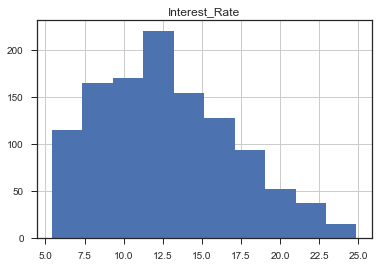

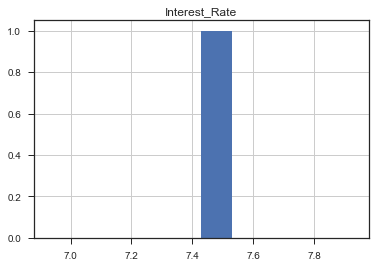

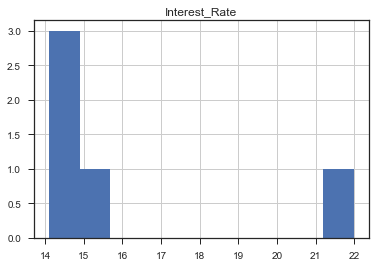

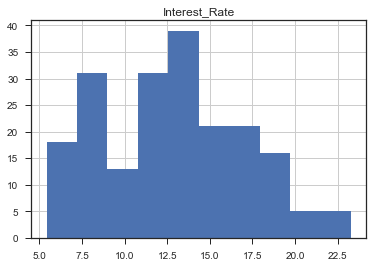

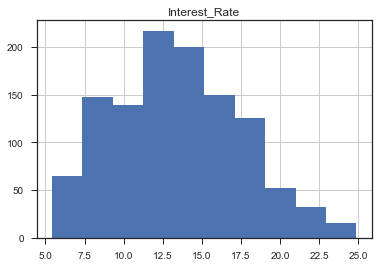

In [96]:
data_new.hist()

In [97]:
sales = pd.read_csv('SalesData.csv')

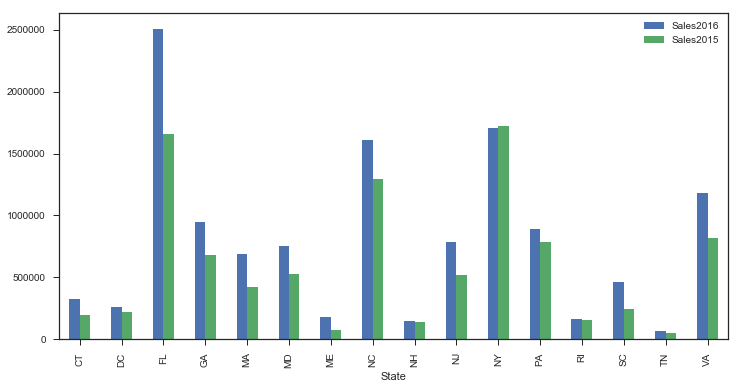

In [98]:
sales4 = sales[sales['Region']=='East']
sales4 = sales4.groupby(['State']).aggregate({'Sales2016':'sum','Sales2015':'sum'})
sales4 = sales4.round(decimals=0)

sales4graph=sales4.plot.bar(figsize=(12,6))

In [99]:
sales4.plot.bar?

In [100]:
plt.bar?